In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-12-18 05:19:34--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving webproxy (webproxy)... 10.36.14.1
Connecting to webproxy (webproxy)|10.36.14.1|:3128... connected.
Proxy request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.03s   

2019-12-18 05:19:35 (2.14 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
df = pd.read_csv('FuelConsumption.csv')

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [6]:
df.columns.tolist()

['MODELYEAR',
 'MAKE',
 'MODEL',
 'VEHICLECLASS',
 'ENGINESIZE',
 'CYLINDERS',
 'TRANSMISSION',
 'FUELTYPE',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB',
 'FUELCONSUMPTION_COMB_MPG',
 'CO2EMISSIONS']

In [7]:
df.isnull().any()

MODELYEAR                   False
MAKE                        False
MODEL                       False
VEHICLECLASS                False
ENGINESIZE                  False
CYLINDERS                   False
TRANSMISSION                False
FUELTYPE                    False
FUELCONSUMPTION_CITY        False
FUELCONSUMPTION_HWY         False
FUELCONSUMPTION_COMB        False
FUELCONSUMPTION_COMB_MPG    False
CO2EMISSIONS                False
dtype: bool

In [8]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [9]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

In [10]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


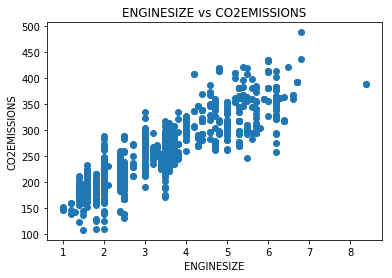

In [11]:
plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'])
plt.title('ENGINESIZE vs CO2EMISSIONS')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [12]:
lm = LinearRegression()

In [13]:
ENGINESIZE = df[['ENGINESIZE']]
FUELCONSUMPTION_COMB = df[['FUELCONSUMPTION_COMB']]
CO2EMISSIONS = df[['CO2EMISSIONS']]
CYLINDERS = df[['CYLINDERS']]

In [14]:
len(ENGINESIZE)

1067

In [15]:
x_train, x_test, y_train, y_test = train_test_split(ENGINESIZE, CO2EMISSIONS, test_size=0.2)

In [16]:
trained_data = lm.fit(x_train, y_train)

In [17]:
print(lm.coef_)
print(lm.intercept_)

[[38.58470269]]
[126.89081103]


In [18]:
print('y = {0} x + {1}'.format(lm.coef_, lm.intercept_))

y = [[38.58470269]] x + [126.89081103]


In [19]:
predicted_y = lm.predict(x_test)

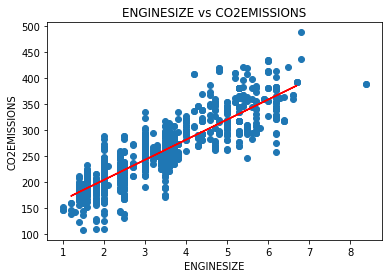

In [20]:
plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'])
plt.plot(x_test, predicted_y, color='red')
plt.title('ENGINESIZE vs CO2EMISSIONS')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [42]:
print('r2_score = ', r2_score(y_test, predicted_y))

r2_score =  0.7696486687097179


In [41]:
print('MSE = ', mean_squared_error(y_test, predicted_y))

MSE =  877.3248847667522


In [47]:
def linear_regression(X_name, Y_name):
    print(X_name, Y_name)
    X = df[[X_name]]
    Y = df[[Y_name]]
    plt.scatter(X, Y)
    plt.title('{0} vs {1}'.format(X_name, Y_name))
    plt.show()
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    lm.fit(X_train, Y_train)
    print('y = {0} x + {1}'.format(lm.coef_, lm.intercept_))
    predicted_Y = lm.predict(X_test)
        
    plt.scatter(X, Y)
    plt.plot(X_test, predicted_Y, color='red')
    plt.title('{0} vs {1}'.format(X_name, Y_name))
    plt.show()

    print('r2_score = ', r2_score(Y_test, predicted_Y))
    print('MSE = ', mean_squared_error(Y_test, predicted_Y))
    
    return r2_score(Y_test, predicted_Y), mean_squared_error(Y_test, predicted_Y)

FUELCONSUMPTION_COMB CO2EMISSIONS


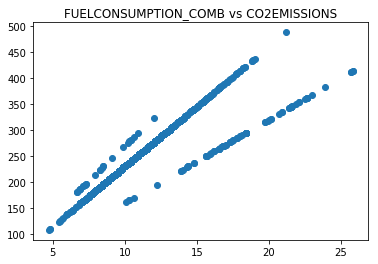

y = [[16.16846402]] x + [68.54418192]


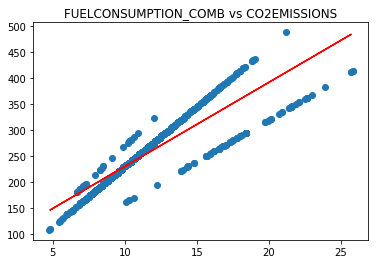

r2_score =  0.7824218581490472
MSE =  745.7936791070055


(0.7824218581490472, 745.7936791070055)

In [48]:
linear_regression('FUELCONSUMPTION_COMB', 'CO2EMISSIONS')

CYLINDERS CO2EMISSIONS


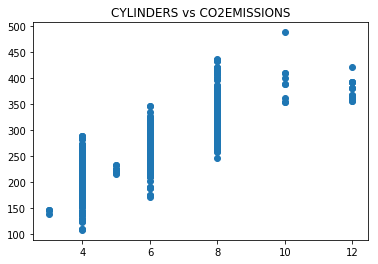

y = [[29.70673018]] x + [84.58756761]


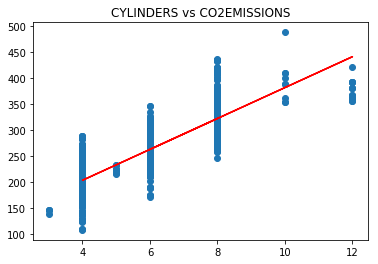

r2_score =  0.7291990411060598
MSE =  1075.0669455964871


(0.7291990411060598, 1075.0669455964871)

In [49]:
linear_regression('CYLINDERS', 'CO2EMISSIONS')

FUELCONSUMPTION_COMB CO2EMISSIONS


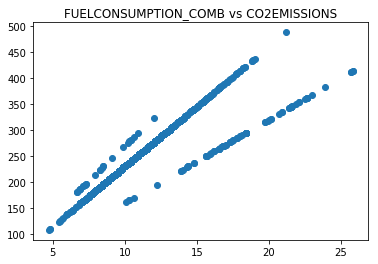

y = [[16.02419137]] x + [70.37821412]


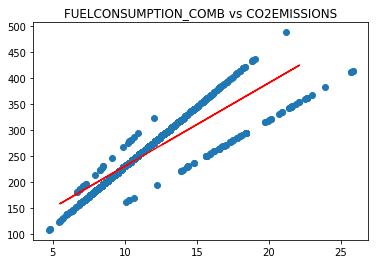

r2_score =  0.783265522718255
MSE =  921.6944058109518


(0.783265522718255, 921.6944058109518)

In [50]:
linear_regression('FUELCONSUMPTION_COMB', 'CO2EMISSIONS')

ENGINESIZE CO2EMISSIONS


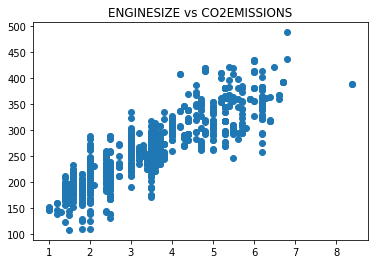

y = [[39.32622104]] x + [124.791276]


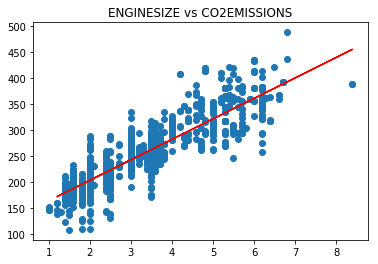

r2_score =  0.7503653509401987
MSE =  934.6006628255861


(0.7503653509401987, 934.6006628255861)

In [51]:
linear_regression('ENGINESIZE', 'CO2EMISSIONS')